In [4]:
!pip install seaborn 

  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ----- --------------------------------- 41.0/294.9 kB 281.8 kB/s eta 0:00:01
   ---------- ---------------------------- 81.9/294.9 kB 459.5 kB/s eta 0:00:01
   ---------------------------------- ----- 256.0/294.9 kB 1.2 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 1.3 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.2.1 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

df= pd.read_csv(r'C:\WORK\Data\weather\weather_classification_data.csv')
print (df)

       Temperature  Humidity  Wind Speed  Precipitation (%)    Cloud Cover  \
0             14.0        73         9.5               82.0  partly cloudy   
1             39.0        96         8.5               71.0  partly cloudy   
2             30.0        64         7.0               16.0          clear   
3             38.0        83         1.5               82.0          clear   
4             27.0        74        17.0               66.0       overcast   
...            ...       ...         ...                ...            ...   
13195         10.0        74        14.5               71.0       overcast   
13196         -1.0        76         3.5               23.0         cloudy   
13197         30.0        77         5.5               28.0       overcast   
13198          3.0        76        10.0               94.0       overcast   
13199         -5.0        38         0.0               92.0       overcast   

       Atmospheric Pressure  UV Index  Season  Visibility (km) 

In [2]:
df= df.sort_values(by=['Humidity'], inplace= False, ascending= False)
df

Temperature  Humidity  Wind Speed  Precipitation (%)    Cloud Cover  \
1303          29.0       109        21.0               93.0  partly cloudy   
8716          16.0       109        27.0              102.0       overcast   
9707          51.0       109        17.0               98.0       overcast   
2812          16.0       109        39.0               87.0  partly cloudy   
12566          4.0       109        16.0               93.0       overcast   
...            ...       ...         ...                ...            ...   
9782         -11.0        20         1.5               57.0         cloudy   
12178         -8.0        20        13.5               41.0  partly cloudy   
7379          47.0        20        14.5               67.0         cloudy   
8841          29.0        20         6.5               10.0  partly cloudy   
11386         39.0        20         4.0                6.0          clear   

       Atmospheric Pressure  UV Index  Season  Visibility (km)  Location  \
1303                1018.98         9  Winter              7.5    inland   
8716                1007.30         1  Winter             11.5    inland   
9707                 994.03         8  Spring              5.5   coastal   
2812                1011.38        11  Spring              2.0    inland   
12566                988.15        12  Winter              3.5    inland   
...                     ...       ...     ...              ...       ...   
9782                1096.28         2  Winter              5.5  mountain   
12178               1025.26         3  Winter              8.5   coastal   
7379                 809.08        13  Summer              5.0   coastal   
8841                1028.18        11  Summer              5.0  mountain   
11386               1012.73         9  Summer              8.0    inland   

      Weather Type  
1303        Cloudy  
8716        Cloudy  
9707         Rainy  
2812         Rainy  
12566        Snowy  
...            ...  
9782         Snowy  
12178       Cloudy  
7379         Sunny  
8841         Sunny  
11386        Sunny  

[13200 rows x 11 columns]

In [3]:
df.dtypes

Temperature             float64
Humidity                  int64
Wind Speed              float64
Precipitation (%)       float64
Cloud Cover              object
Atmospheric Pressure    float64
UV Index                  int64
Season                   object
Visibility (km)         float64
Location                 object
Weather Type             object
dtype: object

In [4]:
#HUMIDITY VS PRECIPITATION

<Axes: xlabel='Humidity', ylabel='Precipitation (%)'>

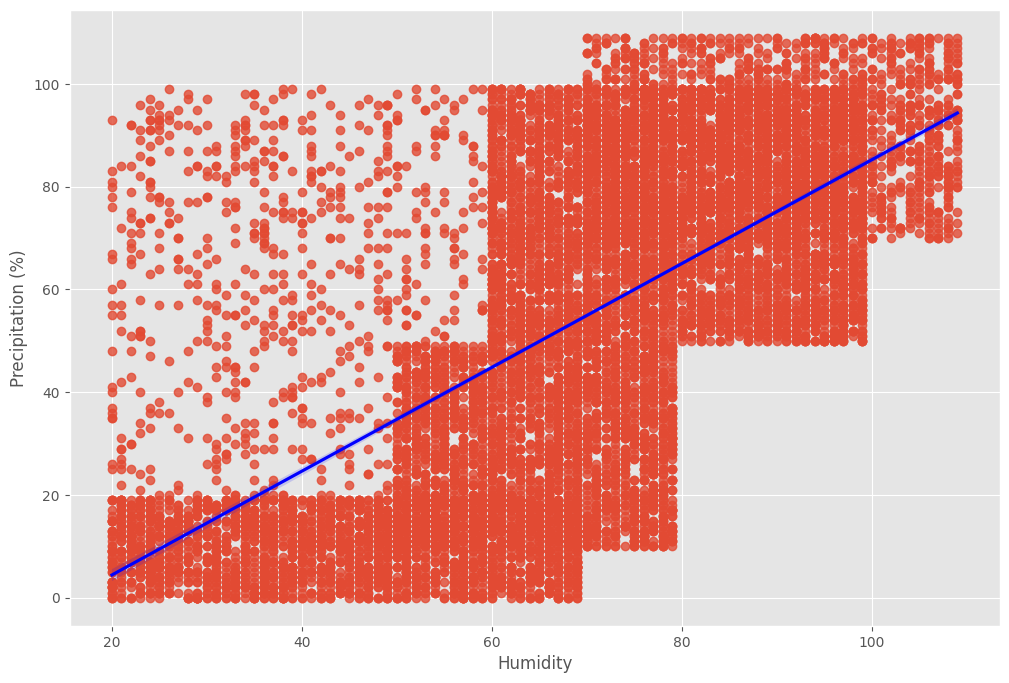

In [25]:
sns.regplot(x='Humidity', y='Precipitation (%)', data=df, line_kws={'color':'blue'})

In [7]:
df.corr(numeric_only=True)

Temperature  Humidity  Wind Speed  Precipitation (%)  \
Temperature              1.000000 -0.207969   -0.070022          -0.287206   
Humidity                -0.207969  1.000000    0.406079           0.638631   
Wind Speed              -0.070022  0.406079    1.000000           0.443770   
Precipitation (%)       -0.287206  0.638631    0.443770           1.000000   
Atmospheric Pressure     0.209188 -0.120653   -0.077757          -0.177444   
UV Index                 0.374773 -0.342694   -0.068147          -0.291601   
Visibility (km)          0.250751 -0.479969   -0.311828          -0.457444   

                      Atmospheric Pressure  UV Index  Visibility (km)  
Temperature                       0.209188  0.374773         0.250751  
Humidity                         -0.120653 -0.342694        -0.479969  
Wind Speed                       -0.077757 -0.068147        -0.311828  
Precipitation (%)                -0.177444 -0.291601        -0.457444  
Atmospheric Pressure              1.000000  0.154128         0.120182  
UV Index                          0.154128  1.000000         0.362922  
Visibility (km)                   0.120182  0.362922         1.000000

In [8]:
df_numerized= df

for col_name in df_numerized.columns:
    if (df_numerized[col_name].dtype== 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized

Temperature  Humidity  Wind Speed  Precipitation (%)  Cloud Cover  \
1303          29.0       109        21.0               93.0            3   
8716          16.0       109        27.0              102.0            2   
9707          51.0       109        17.0               98.0            2   
2812          16.0       109        39.0               87.0            3   
12566          4.0       109        16.0               93.0            2   
...            ...       ...         ...                ...          ...   
9782         -11.0        20         1.5               57.0            1   
12178         -8.0        20        13.5               41.0            3   
7379          47.0        20        14.5               67.0            1   
8841          29.0        20         6.5               10.0            3   
11386         39.0        20         4.0                6.0            0   

       Atmospheric Pressure  UV Index  Season  Visibility (km)  Location  \
1303                1018.98         9       3              7.5         1   
8716                1007.30         1       3             11.5         1   
9707                 994.03         8       1              5.5         0   
2812                1011.38        11       1              2.0         1   
12566                988.15        12       3              3.5         1   
...                     ...       ...     ...              ...       ...   
9782                1096.28         2       3              5.5         2   
12178               1025.26         3       3              8.5         0   
7379                 809.08        13       2              5.0         0   
8841                1028.18        11       2              5.0         2   
11386               1012.73         9       2              8.0         1   

       Weather Type  
1303              0  
8716              0  
9707              1  
2812              1  
12566             2  
...             ...  
9782              2  
12178             0  
7379              3  
8841              3  
11386             3  

[13200 rows x 11 columns]

In [23]:
df

Temperature  Humidity  Wind Speed  Precipitation (%)    Cloud Cover  \
1303          29.0       109        21.0               93.0  partly cloudy   
8716          16.0       109        27.0              102.0       overcast   
9707          51.0       109        17.0               98.0       overcast   
2812          16.0       109        39.0               87.0  partly cloudy   
12566          4.0       109        16.0               93.0       overcast   
...            ...       ...         ...                ...            ...   
9782         -11.0        20         1.5               57.0         cloudy   
12178         -8.0        20        13.5               41.0  partly cloudy   
7379          47.0        20        14.5               67.0         cloudy   
8841          29.0        20         6.5               10.0  partly cloudy   
11386         39.0        20         4.0                6.0          clear   

       Atmospheric Pressure  UV Index  Season  Visibility (km)  Location  \
1303                1018.98         9  Winter              7.5    inland   
8716                1007.30         1  Winter             11.5    inland   
9707                 994.03         8  Spring              5.5   coastal   
2812                1011.38        11  Spring              2.0    inland   
12566                988.15        12  Winter              3.5    inland   
...                     ...       ...     ...              ...       ...   
9782                1096.28         2  Winter              5.5  mountain   
12178               1025.26         3  Winter              8.5   coastal   
7379                 809.08        13  Summer              5.0   coastal   
8841                1028.18        11  Summer              5.0  mountain   
11386               1012.73         9  Summer              8.0    inland   

      Weather Type  
1303        Cloudy  
8716        Cloudy  
9707         Rainy  
2812         Rainy  
12566        Snowy  
...            ...  
9782         Snowy  
12178       Cloudy  
7379         Sunny  
8841         Sunny  
11386        Sunny  

[13200 rows x 11 columns]

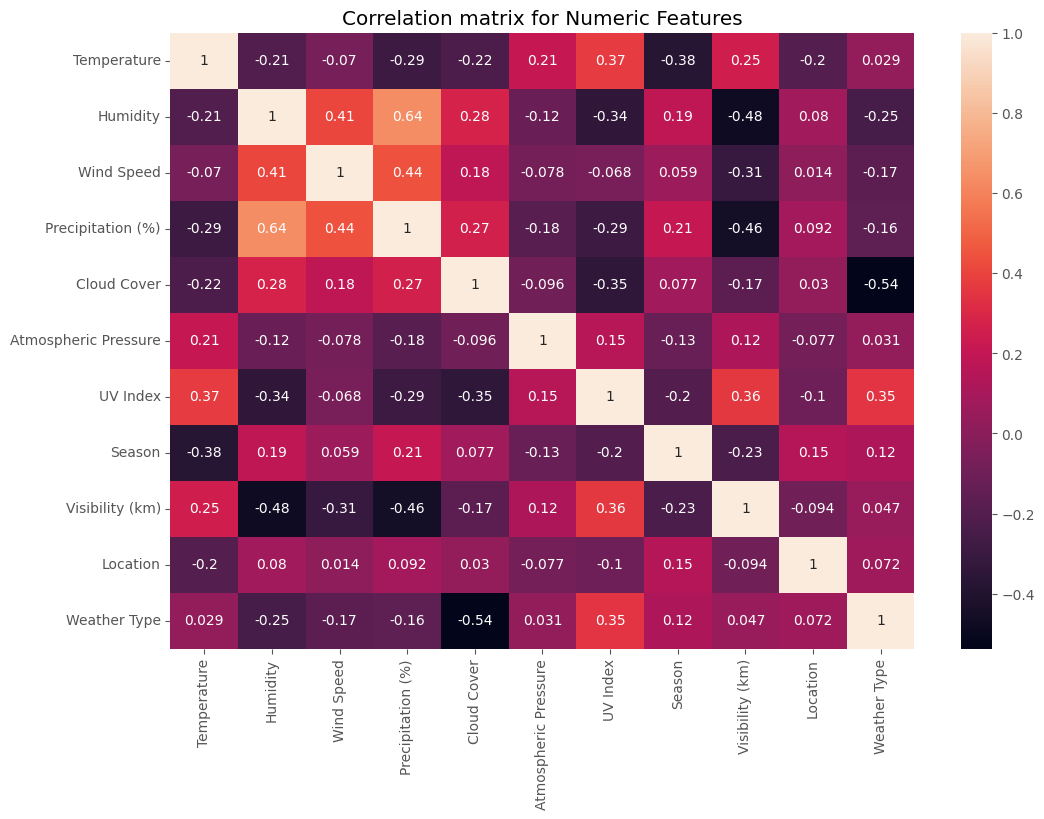

In [10]:
correlation_matrix = df_numerized.corr()

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.show()

In [11]:
correlation_matrix

Temperature  Humidity  Wind Speed  Precipitation (%)  \
Temperature              1.000000 -0.207969   -0.070022          -0.287206   
Humidity                -0.207969  1.000000    0.406079           0.638631   
Wind Speed              -0.070022  0.406079    1.000000           0.443770   
Precipitation (%)       -0.287206  0.638631    0.443770           1.000000   
Cloud Cover             -0.224642  0.277199    0.183863           0.267368   
Atmospheric Pressure     0.209188 -0.120653   -0.077757          -0.177444   
UV Index                 0.374773 -0.342694   -0.068147          -0.291601   
Season                  -0.377942  0.189145    0.058676           0.210372   
Visibility (km)          0.250751 -0.479969   -0.311828          -0.457444   
Location                -0.196108  0.079968    0.014091           0.091911   
Weather Type             0.028923 -0.250558   -0.166485          -0.161578   

                      Cloud Cover  Atmospheric Pressure  UV Index    Season  \
Temperature             -0.224642              0.209188  0.374773 -0.377942   
Humidity                 0.277199             -0.120653 -0.342694  0.189145   
Wind Speed               0.183863             -0.077757 -0.068147  0.058676   
Precipitation (%)        0.267368             -0.177444 -0.291601  0.210372   
Cloud Cover              1.000000             -0.096133 -0.347301  0.076947   
Atmospheric Pressure    -0.096133              1.000000  0.154128 -0.126795   
UV Index                -0.347301              0.154128  1.000000 -0.201870   
Season                   0.076947             -0.126795 -0.201870  1.000000   
Visibility (km)         -0.169604              0.120182  0.362922 -0.231691   
Location                 0.030464             -0.077053 -0.100510  0.147115   
Weather Type            -0.536681              0.030679  0.345804  0.118791   

                      Visibility (km)  Location  Weather Type  
Temperature                  0.250751 -0.196108      0.028923  
Humidity                    -0.479969  0.079968     -0.250558  
Wind Speed                  -0.311828  0.014091     -0.166485  
Precipitation (%)           -0.457444  0.091911     -0.161578  
Cloud Cover                 -0.169604  0.030464     -0.536681  
Atmospheric Pressure         0.120182 -0.077053      0.030679  
UV Index                     0.362922 -0.100510      0.345804  
Season                      -0.231691  0.147115      0.118791  
Visibility (km)              1.000000 -0.093642      0.047448  
Location                    -0.093642  1.000000      0.071665  
Weather Type                 0.047448  0.071665      1.000000

In [12]:
#unstacking the stacked correl data
correlation_mat= correlation_matrix
corr_unstack=correlation_mat.unstack()
corr_unstack

Temperature   Temperature          1.000000
              Humidity            -0.207969
              Wind Speed          -0.070022
              Precipitation (%)   -0.287206
              Cloud Cover         -0.224642
                                     ...   
Weather Type  UV Index             0.345804
              Season               0.118791
              Visibility (km)      0.047448
              Location             0.071665
              Weather Type         1.000000
Length: 121, dtype: float64

In [13]:
#sorting the correl data
corr_sort=corr_unstack.sort_values(ascending= False)
corr_sort

Temperature        Temperature        1.000000
Humidity           Humidity           1.000000
Location           Location           1.000000
Visibility (km)    Visibility (km)    1.000000
Season             Season             1.000000
                                        ...   
Precipitation (%)  Visibility (km)   -0.457444
Visibility (km)    Humidity          -0.479969
Humidity           Visibility (km)   -0.479969
Cloud Cover        Weather Type      -0.536681
Weather Type       Cloud Cover       -0.536681
Length: 121, dtype: float64

In [14]:
#high corelation
corr_sort[(corr_sort)>0.3]

Temperature           Temperature             1.000000
Humidity              Humidity                1.000000
Location              Location                1.000000
Visibility (km)       Visibility (km)         1.000000
Season                Season                  1.000000
UV Index              UV Index                1.000000
Cloud Cover           Cloud Cover             1.000000
Precipitation (%)     Precipitation (%)       1.000000
Wind Speed            Wind Speed              1.000000
Atmospheric Pressure  Atmospheric Pressure    1.000000
Weather Type          Weather Type            1.000000
Humidity              Precipitation (%)       0.638631
Precipitation (%)     Humidity                0.638631
                      Wind Speed              0.443770
Wind Speed            Precipitation (%)       0.443770
                      Humidity                0.406079
Humidity              Wind Speed              0.406079
UV Index              Temperature             0.374773
Temperatur

In [19]:
#HUMIDITY AND PRECIPITATON SHOWS THE HIGHEST CORRELATION OF ~0.64 WHILE THE LOWEST IS SHOWN BY WEATHER TYPE AND UV INDEX (~0.35)

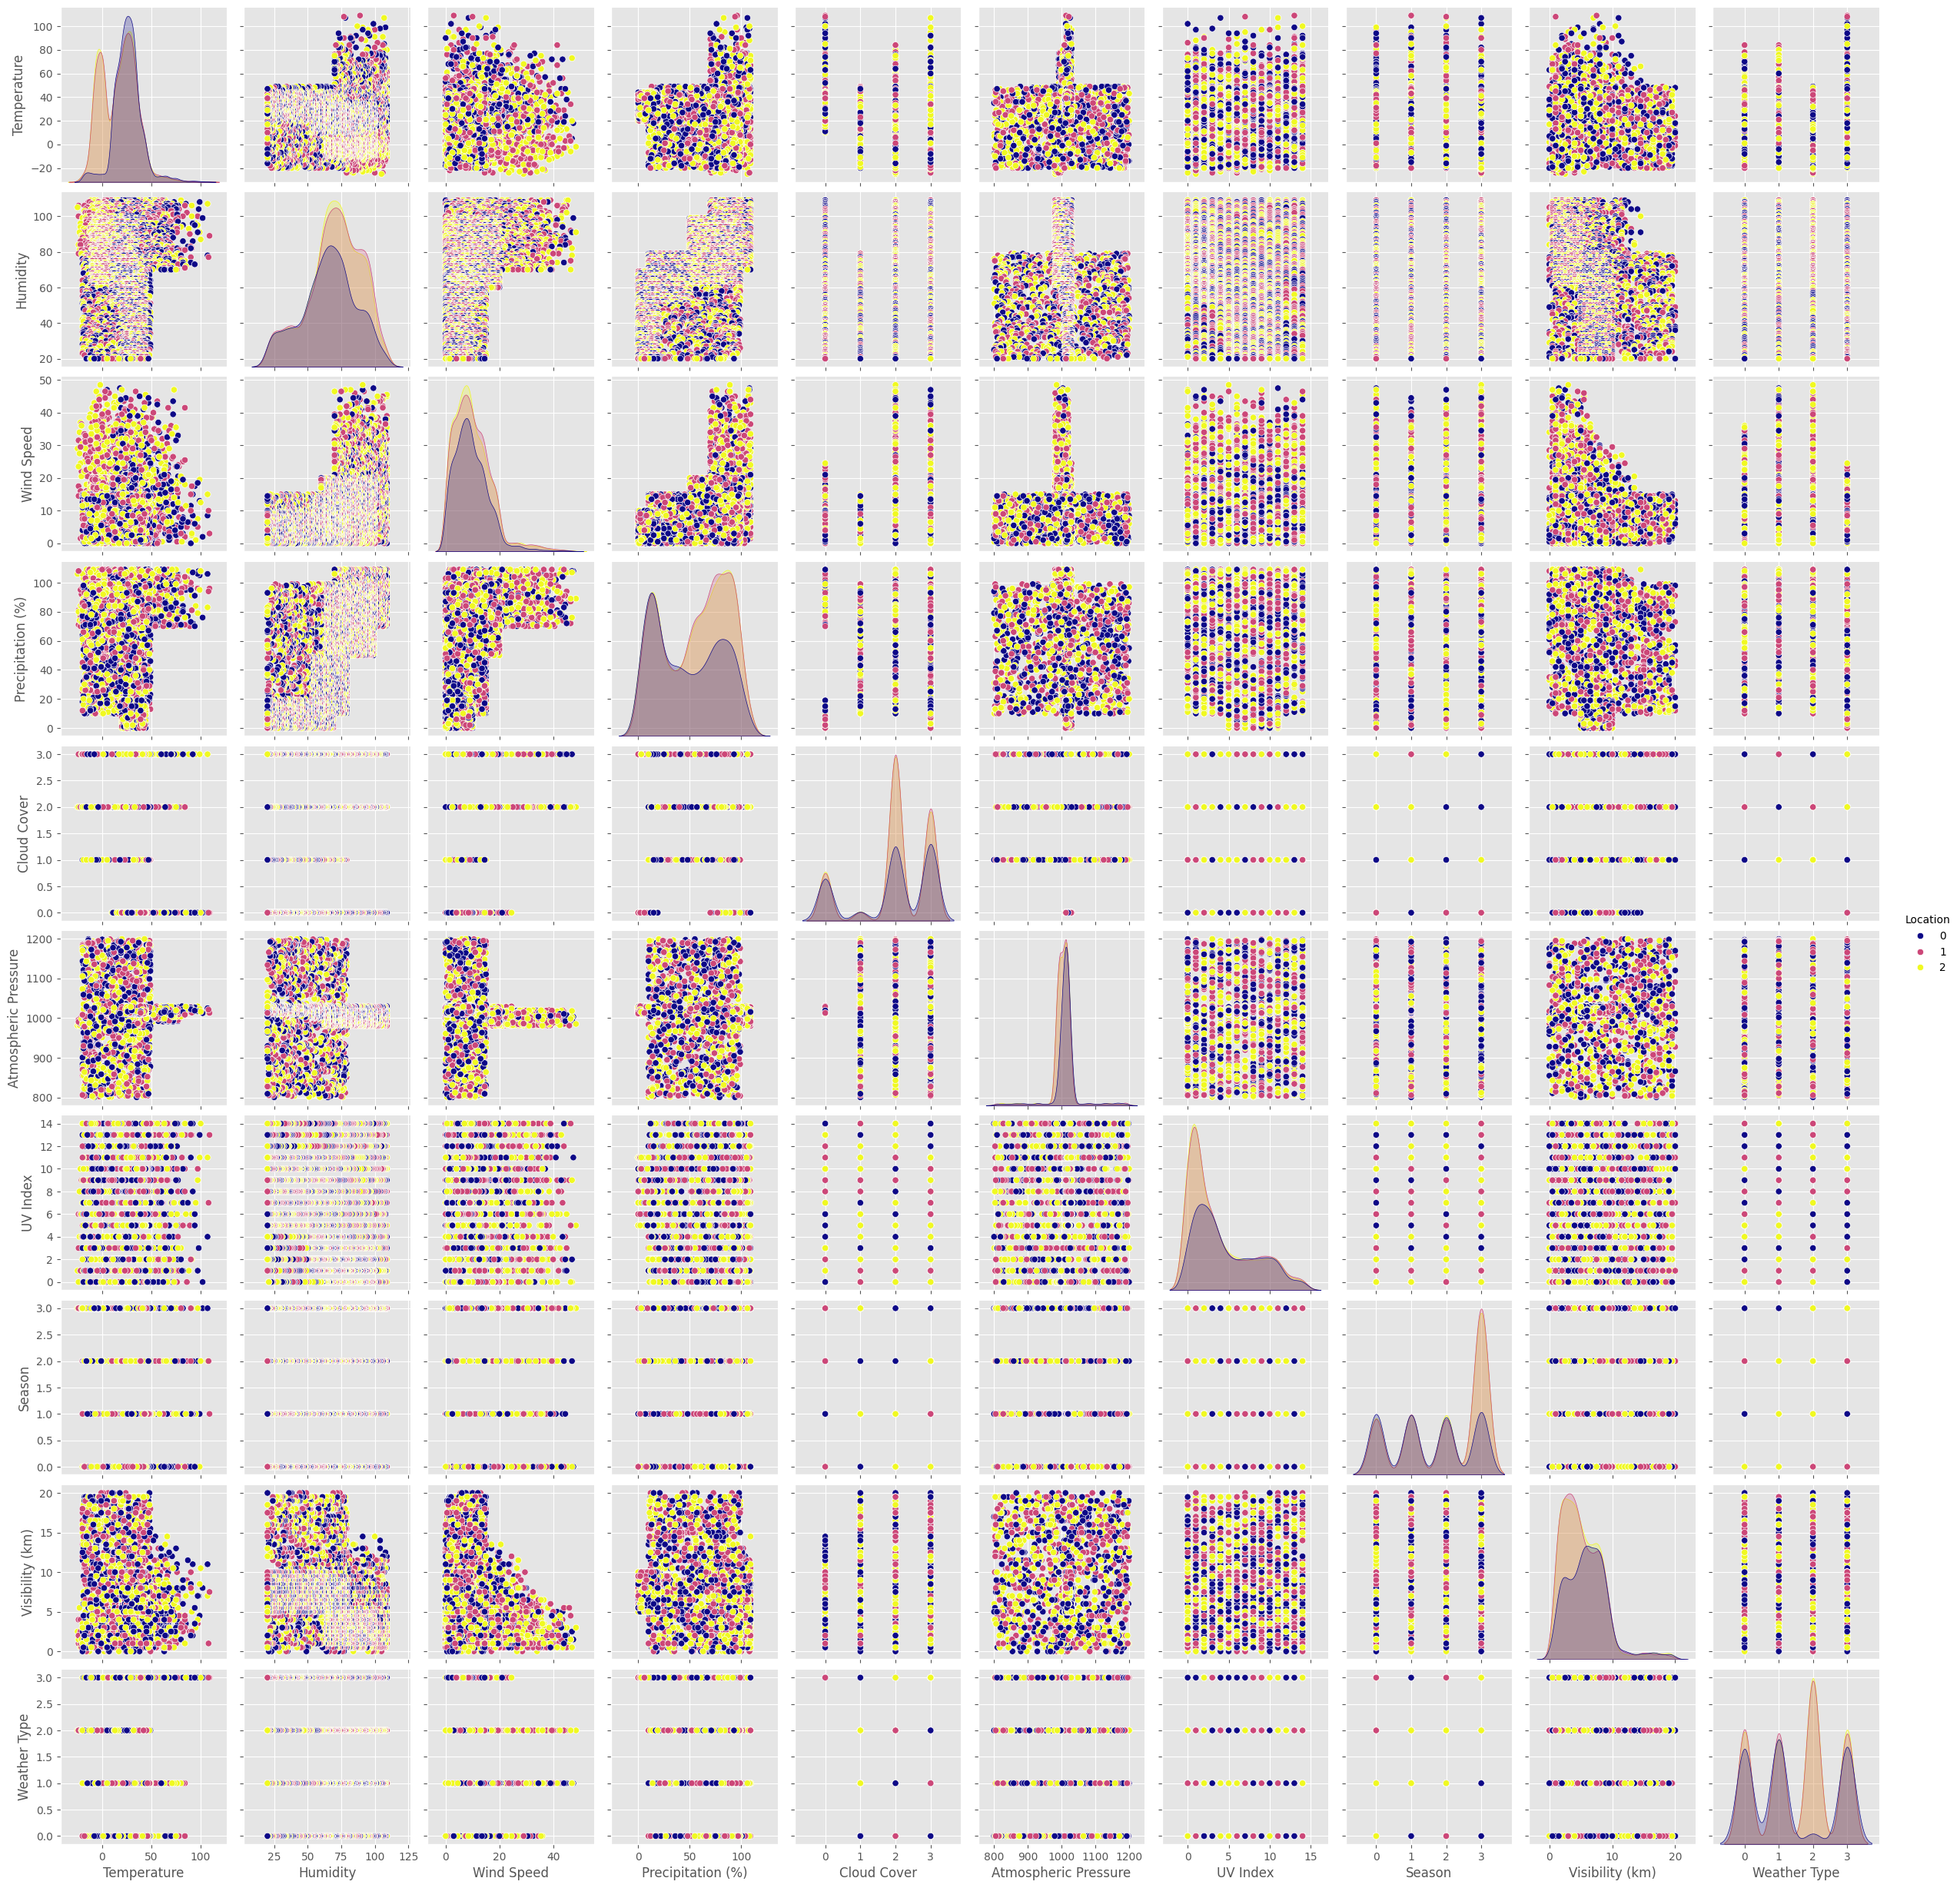

In [15]:
sns.pairplot(df_numerized, hue= 'Location', palette= 'plasma').savefig(r'C:\WORK\Data\weather\pairplot.png')

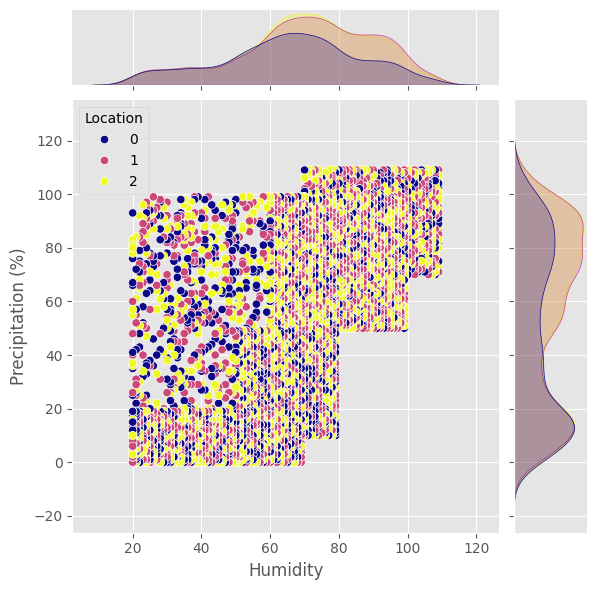

In [24]:
sns.jointplot(x="Humidity",y="Precipitation (%)",data=df_numerized, hue="Location", palette= 'plasma')

#where 0 is Cloudy, 1 is Rainy, 2 is Snowy, and 3 is Sunny weather types.

In [26]:
#ATMOSPHERIC PRESSURE VS WIND SPEED

<Axes: xlabel='Atmospheric Pressure', ylabel='Wind Speed'>

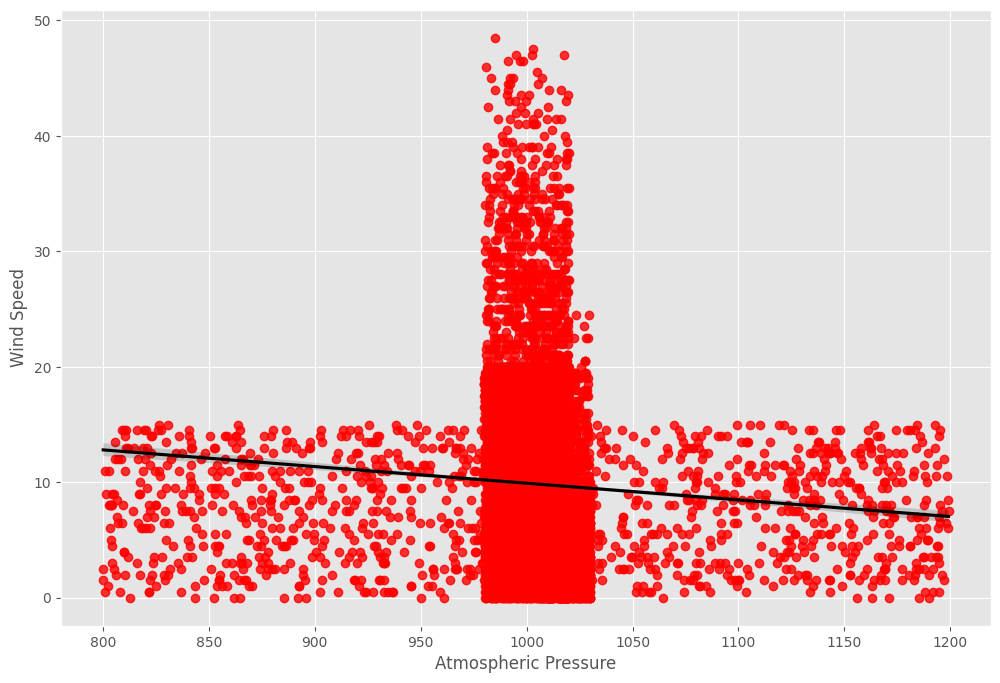

In [38]:
sns.regplot(x='Atmospheric Pressure', y='Wind Speed', data=df, scatter_kws={'color': 'red'}, line_kws={'color':'black'})

In [42]:
#calculating the correlation
columns_of_interest = ['Wind Speed', 'Atmospheric Pressure']
if all(col in df_numerized.columns for col in columns_of_interest):
    correlation_matrix = df_numerized[columns_of_interest].corr()
    print(correlation_matrix)
else:
    print(f"The required columns are not present in the DataFrame: {', '.join(columns_of_interest)}")

                      Wind Speed  Atmospheric Pressure
Wind Speed              1.000000             -0.077757
Atmospheric Pressure   -0.077757              1.000000


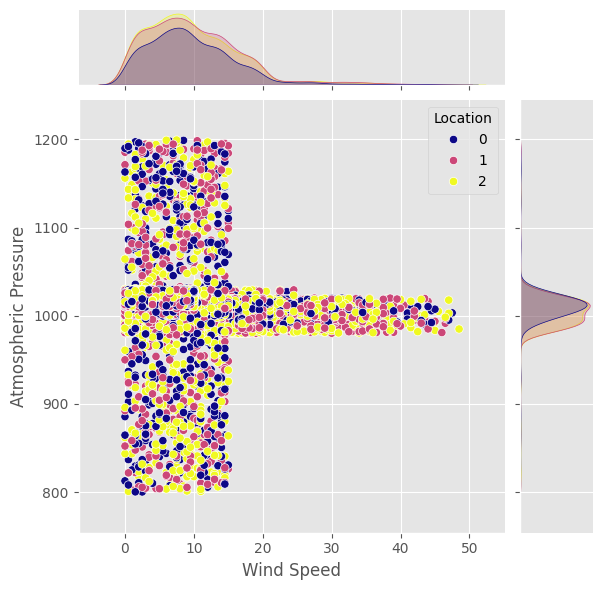

In [43]:
sns.jointplot(x="Wind Speed",y="Atmospheric Pressure",data=df_numerized, hue="Location", palette= 'plasma')

In [46]:
#SHOWS AN OBSERVATION-WITH INCREASING ATMOSPHERIC PRESSURE TILL ABOUT 990 UNITS, THE WIND SPEED REMAINS CONSTANT AT 0-15 UNITS. 
# BETWEEN 990 AND 1030 UNITS OF ATMOSPHERIC PRESSURE, WIND SPEED DRAMATICALLY INCREASES TILL ~48 UNITS. 
#THIS SHOWS AN ANOMALY AT THAT PARTICULAR RANGE OF ATMOSPHERIC PRESSURE
